In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
from pycharm_project.LogisticRegression import LogisticRegression

In [3]:
X = iris.data
y = iris.target

In [4]:
X = X[y<2,:2]
y = y[y<2]


In [5]:
X.shape  #有100个样本，每一个样本都有两个特征

(100, 2)

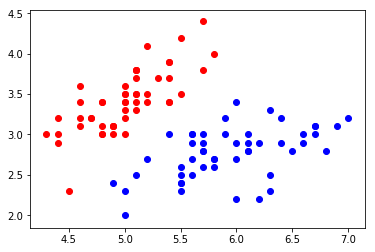

In [6]:
plt.scatter(X[y ==0,0],X[y==0,1],color='r')
plt.scatter(X[y ==1,0],X[y==1,1],color='b')
plt.show()

### 使用逻辑回归


In [7]:
from pycharm_project.model_selection_split import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,seed = 666)

In [9]:
X_train.shape

(80, 2)

In [10]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()训练完毕

In [11]:
log_reg.score(X_test,y_test)

1.0

In [12]:
log_reg.predict_proba(X_test)


array([0.92972035, 0.98664939, 0.14852024, 0.17601199, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [13]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [14]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [15]:
log_reg.score(X_test,y_test)

1.0

In [16]:
log_reg.coef_

array([ 3.01796521, -5.04447145])

In [17]:
from sklearn.linear_model import  LogisticRegression

In [18]:
log_reg3 = LogisticRegression()
log_reg3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
log_reg3.coef_

array([[ 2.03164544, -3.37830287]])

In [20]:
def x2(x1):
    return (-log_reg.coef_[0] * x1 - log_reg.interception_)/log_reg.coef_[1]

In [21]:
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)

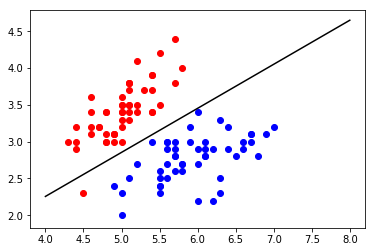

In [23]:
plt.plot(x1_plot,x2_plot,color='black')
plt.scatter(X[y ==0,0],X[y==0,1],color='r')
plt.scatter(X[y ==1,0],X[y==1,1],color='b')
plt.show()


In [28]:
def plot_decision_boundary(model,axis):
    #绘制不规则决策边界的方法
    x0,x1 = np.meshgrid(
            np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
            np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

E:\Anaconda3\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


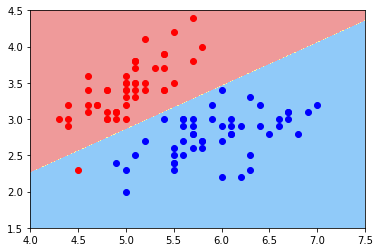

In [33]:
plot_decision_boundary(log_reg,axis=[4,7.5,1.5,4.5])
plt.scatter(X[y ==0,0],X[y==0,1],color='r')
plt.scatter(X[y ==1,0],X[y==1,1],color='b')
plt.show()